In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
import pandas as pd

In [2]:
%matplotlib widget
plt.close('all')

### Task 1
Plotten Sie einen Ausschnitt des Signal $x(t) = cos(2 \pi f_0 t)$ mit f0 = 500 kHz und fs = 44.1 kHz von [0, 25 ms]. Definieren Sie sich hierfür einen Zeitvektor (numpy array) und nutzen Sie matplotlib zum Plotten. Fügen Sie x- und y-Labels (Beschriftungen) hinzu.

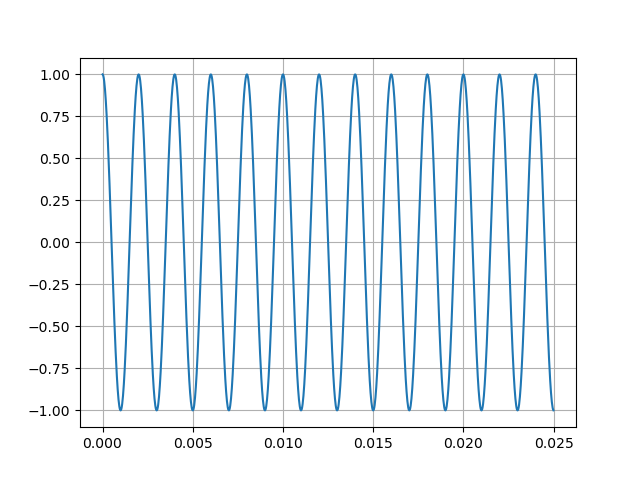

In [3]:
# ADD CODE HERE
f0 = 500
fs = 44.1e3
ts = 1/fs

t = np.arange(0, 25e-3, ts)

x = np.cos(2*np.pi*f0*t)

plt.figure(1, clear=True)
plt.plot(t, x)
plt.grid(True)
plt.show()

### Task 2
Lesen Sie das File chord-ringout.wav mit dem scipy.io Modul ein. Spielen Sie den Sound mit der Library sounddevice ab. Bestimmen Sie den Akkord. Tipp: Berechnen Sie das Spektrum mittels der FFT und lesen Sie die ersten drei dominanten Töne aus. Bei den weiteren Peaks im Spektrum handelt es sich um Obertöne.

Auf der Webseite https://newt.phys.unsw.edu.au/music/note/ kann man eine Frequenz in einen Ton umwandeln. 

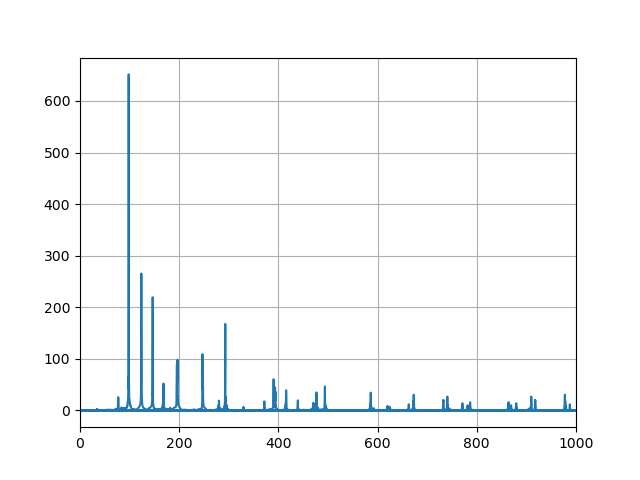

In [4]:
fs, data = wavfile.read('Data/chord-ringout.wav')

# play wav
sd.play(data)

# fft
N = data.shape[0]
f = np.arange(0,N)*fs/N
X = np.abs(np.fft.fft(data[:,0])/N)

# plot
plt.figure(2, clear=True)
plt.plot(f, X)
plt.xlim(0, 1000)
plt.grid(True)
plt.show()

### Task 3

Das File Magnetometer/Raw_Data.csv enthält (unkalibrierte) 3D Erdmagnetfeldmessungen, die mit einem iPhone 13 mini aufgenommen wurden. Dabei wurden zufällige Bewegungen gemacht. Zu welchem Zeitpunkt hat sich das Handy nahe eines externen Magnetfeldes befunden? In diesem Beispiel wurde das externe Magnetfeld durch das Ladegerät eines Notebooks generiert. 

Tipp: Lesen Sie die .csv Datei mit pandas ein und erstellen Sie 4 Subplots: Die x, y, z Komponente des gemessenen Magnetfeldes sowie den Betrag. 

Laden Sie die Phyphox App https://phyphox.org auf Ihr Smartphone und replizieren Sie das Experiment.


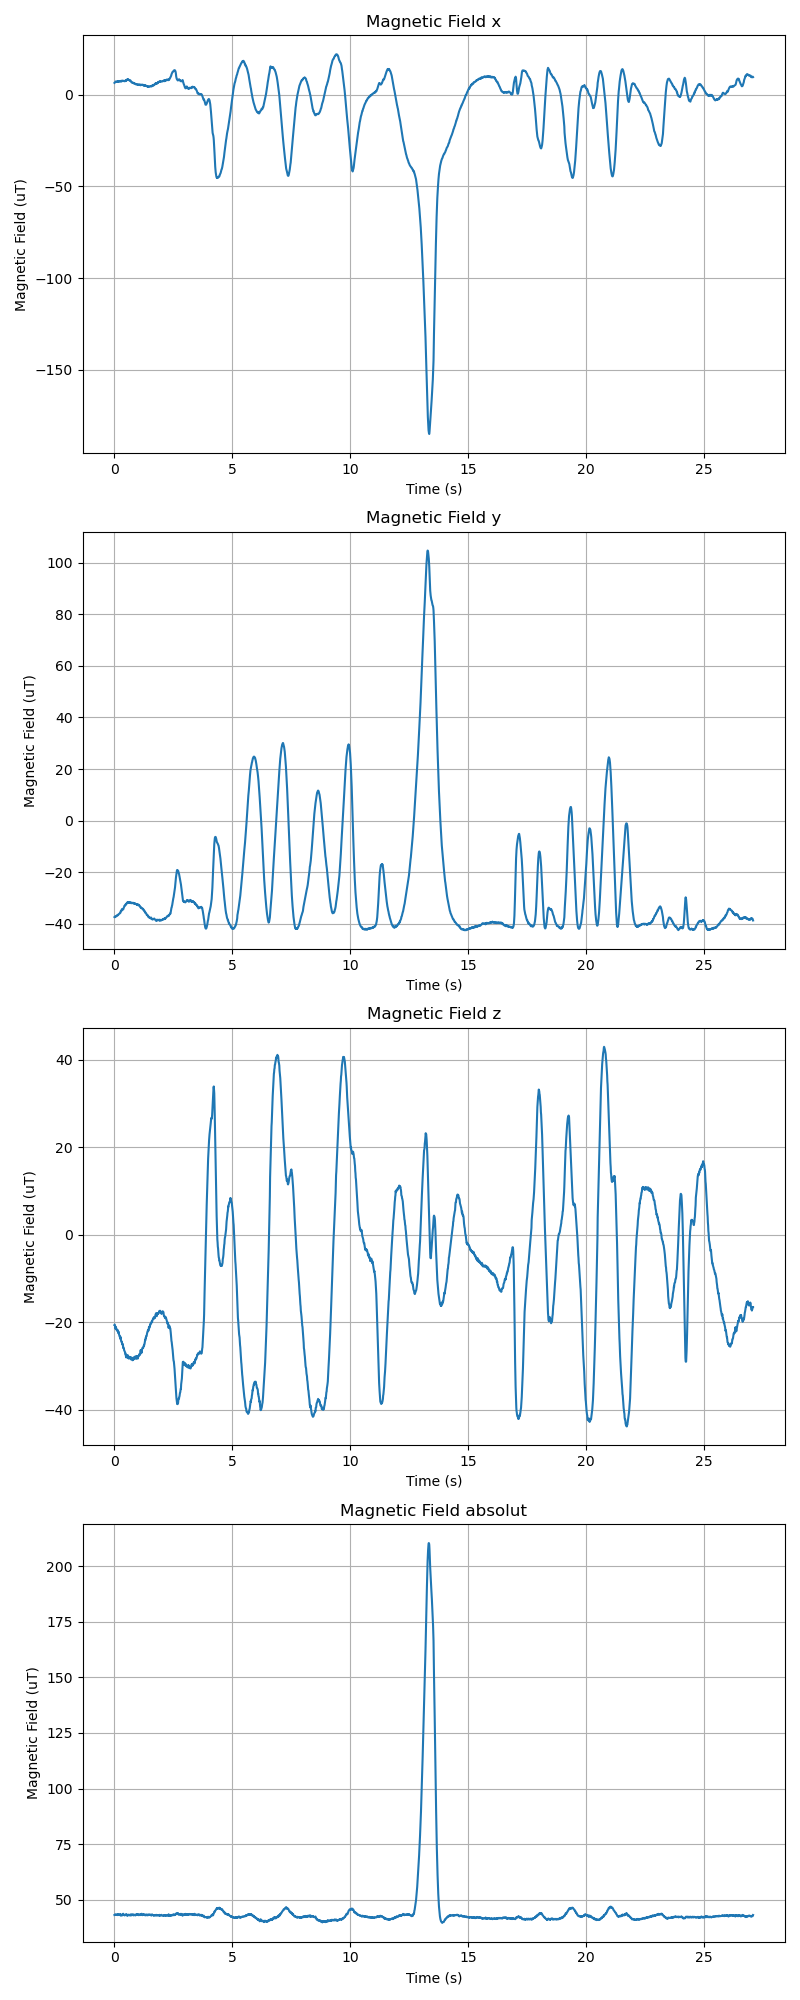

In [6]:
# read data
data = pd.read_csv('Data/Magnetometer/Raw_Data.csv')

t = data['Time (s)']
x = data['Magnetic Field x (µT)']
y = data['Magnetic Field y (µT)']
z = data['Magnetic Field z (µT)']
abs = data['Absolute field (µT)']

# plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, num=3, clear=True)
fig.set_size_inches((8,20))
fig.set_tight_layout(True)

ax1.plot(t,x)
ax1.set_title('Magnetic Field x')
ax1.set_ylabel('Magnetic Field (uT)')
ax1.set_xlabel('Time (s)')
ax1.grid(True)

ax2.plot(t,y)
ax2.set_title('Magnetic Field y')
ax2.set_ylabel('Magnetic Field (uT)')
ax2.set_xlabel('Time (s)')
ax2.grid(True)

ax3.plot(t,z)
ax3.set_title('Magnetic Field z')
ax3.set_ylabel('Magnetic Field (uT)')
ax3.set_xlabel('Time (s)')
ax3.grid(True)

ax4.plot(t,abs)
ax4.set_title('Magnetic Field absolut')
ax4.set_ylabel('Magnetic Field (uT)')
ax4.set_xlabel('Time (s)')
ax4.grid(True)

plt.show()

### Task 4: Zufallssignale
Gegeben seien zwei 1000 Samples lange Zufallssignale. Bestimmen Sie den Mittelwert und die Varianz der beiden stationären Prozesse. Plotten Sie zudem die Histogramme.

gauss signal
	mean: 1.060e-02
	var:  9.937e-01

uniform signal
	mean: 5.167e-01
	var:  7.900e-02


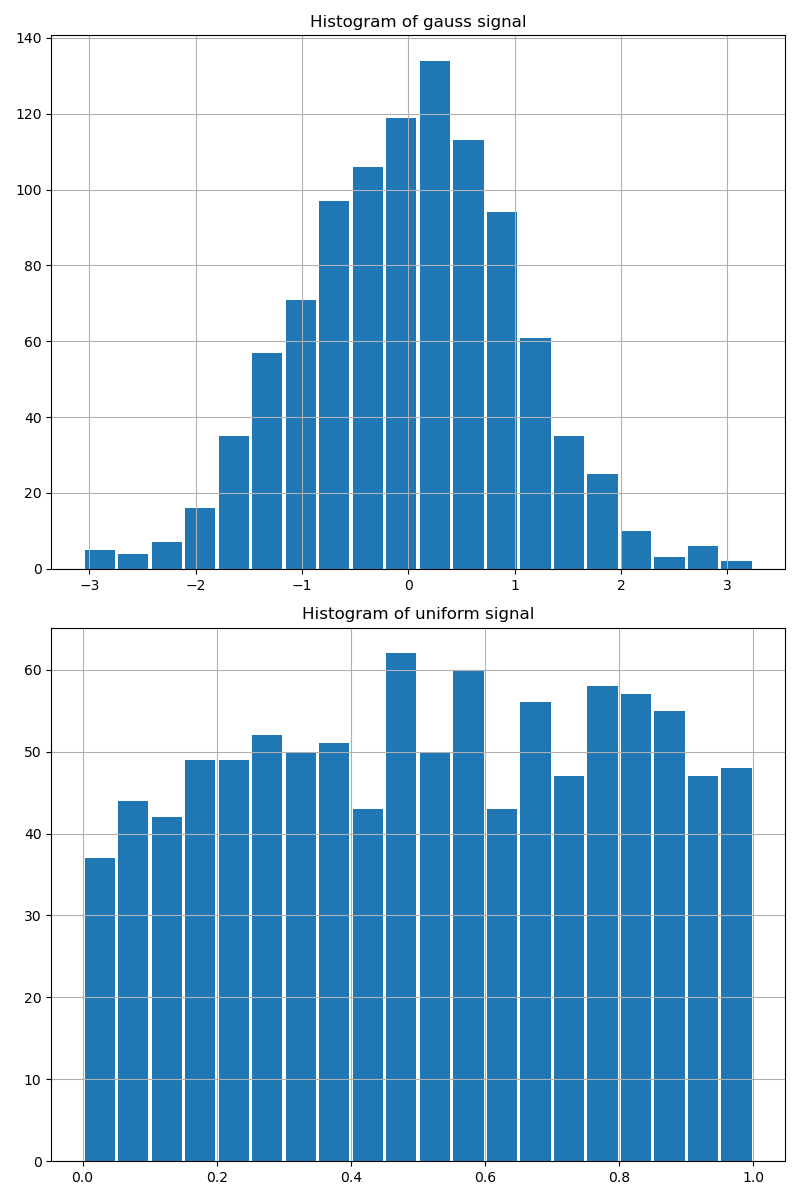

In [7]:
# Generate a random signal with 200 data points from a normal distribution
x_gauss_rnd_signal = np.random.normal(loc=0, scale=1, size=1000)
x_uniform_rnd_signal = np.random.uniform(low=0.0, high=1.0, size=1000)

print(f'gauss signal')
print(f'\tmean: {np.mean(x_gauss_rnd_signal):.3e}')
print(f'\tvar:  {np.var(x_gauss_rnd_signal):.3e}')

print(f'\nuniform signal')
print(f'\tmean: {np.mean(x_uniform_rnd_signal):.3e}')
print(f'\tvar:  {np.var(x_uniform_rnd_signal):.3e}')

#plot
fig, (ax1, ax2) = plt.subplots(2,1, num=4, clear=True)
fig.set_size_inches((8,12))
fig.set_tight_layout(True)

ax1.hist(x_gauss_rnd_signal, bins=20, rwidth=0.9)
ax1.set_title('Histogram of gauss signal')
ax1.grid(True)

ax2.hist(x_uniform_rnd_signal, bins=20, rwidth=0.9)
ax2.set_title('Histogram of uniform signal')
ax2.grid(True)

plt.show()
